# Nuages de mots

In [15]:
# ============================================================
# ANALYSE DE CORPUS — VERSION FINALE PROPRE
# ============================================================

import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# ------------------------------------------------------------
# Configuration
# ------------------------------------------------------------

data_path = "../../data/txt_tp4"
output_dir = "../../data/results/"
os.makedirs(output_dir, exist_ok=True)

# Téléchargement ressources NLTK si besoin
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)

True

In [ ]:
# Stopwords français
sw = set(stopwords.words("french"))

# Stopwords personnalisés (journalisme, bruit thématique)
stopwords_custom = {
    "bruxelles","soir","matin","hier","demain","samedi","dimanche","lundi","mardi","mercredi",
    "jeudi","vendredi","rossel","belga","afp","programme","heures","etc","tout","comme","sans",
    "bien","tous","grand","fait","apres","donc","etre","tres","non","aussi","ans","sous","encore",
    "monde","faire","cours","trois","entre","avant","alors","meme","depuis","peu","fois","jours",
    "ainsi","dire","autre","annee","peut","part","toute","moins","bon","lieu","toutes",
    "ville","place","rue","quartier","gare","train","metro","bus","parking",
    "pays","gouvernement","ministre","election","parti","loi","decision",
    "temps","vie","homme","personne","groupe","cas","question","moment", "tèlephone","telephone","tèl"
}

# MOTS CIBLES (jamais filtrés)
mots_cibles = {
    # Sorcellerie
    "sorciere","sorcieres","sorcier","sorciers","sorcellerie","magie","magique","sortilege",
    "envoûtement","demon","diable","sabbat","rituel","potion","malefice","exorcisme",
    # Feminisme
    "feminisme","feministes","mlf","sororite","emancipation","autonomie","woman","women",
    # Justice / persécution
    "proces","tribunal","accusation","torture","bucher","execution","chatiment","inquisition",
    "victime","aveu","aveux","chasse","persecution",
    # Folklore
    "macrale","tchestia","legende","mythe","conte","suprerstition",
    # Stigmatisation
    "hysterie","folie","demoniaque","heretique","maudite","satanique"
}

# Lemmatisation
lemmatizer = WordNetLemmatizer()

In [17]:
# ------------------------------------------------------------
# FONCTIONS
# ------------------------------------------------------------

def nettoyer_mot(mot):
    """Nettoyage complet d'un mot"""
    mot = mot.lower()
    mot = re.sub(r"[^a-zàâäéèêëîïôöùûüç-]", "", mot)  # lettres et tirets
    mot = lemmatizer.lemmatize(mot)
    return mot.strip()

def filtrer_mots(words, min_len=3, max_len=15):
    """Filtrer mots : stopwords, taille, lettres seulement, mais garder les mots-cibles"""
    final = []
    for w in words:
        w = nettoyer_mot(w)
        if not w.isalpha():
            continue
        if len(w) < min_len or len(w) > max_len:
            continue
        if w in mots_cibles:
            final.append(w)
            continue
        if w in sw or w in stopwords_custom:
            continue
        final.append(w)
    return final

def nettoyer_texte(t):
    """Nettoyage initial du texte avant tokenisation"""
    t = re.sub(r"\d+", " ", t)                # supprimer chiffres
    t = re.sub(r"[^\w\s\-àâäéèêëîïôöùûüç]", " ", t)  # ponctuation
    t = re.sub(r"\s+", " ", t)                # espaces multiples
    return t.strip()

def extract_year(filename):
    parts = filename.split("_")
    for p in parts:
        if re.match(r"(19|20)\d{2}-\d{2}-\d{2}", p):
            return int(p[:4])
    return None

In [19]:
# ------------------------------------------------------------
# CHARGEMENT DU CORPUS
# ------------------------------------------------------------

files = [f for f in os.listdir(data_path) if f.endswith(".txt")]

corpus = []
corpus_decennies = {}

for f in files:
    year = extract_year(f)
    if year is None:
        continue
    dec = (year // 10) * 10

    with open(os.path.join(data_path, f), "r", encoding="utf-8", errors="ignore") as ff:
        text = nettoyer_texte(ff.read())
        words = filtrer_mots(text.split())
    corpus.extend(words)
    corpus_decennies.setdefault(dec, []).append(" ".join(words))

print("Décennies :", sorted(corpus_decennies.keys()))
print("Taille corpus global :", len(corpus))

Décennies : [1950, 1960, 1970]
Taille corpus global : 2507192



Analyse n-grammes — 1960
Top 20 : [('chasse', 234), ('victime', 201), ('diable', 198), ('conte', 179), ('faveur', 150), ('contes', 132), ('contemporaine', 125), ('tribunal', 119), ('raconte', 90), ('victimes', 90), ('folie', 78), ('magie', 76), ('contemporains', 71), ('chasseurs', 69), ('contenant', 67), ('magique', 61), ('musique contemporaine', 59), ('contenu', 56), ('contemporain', 55), ('spirituel', 52)]


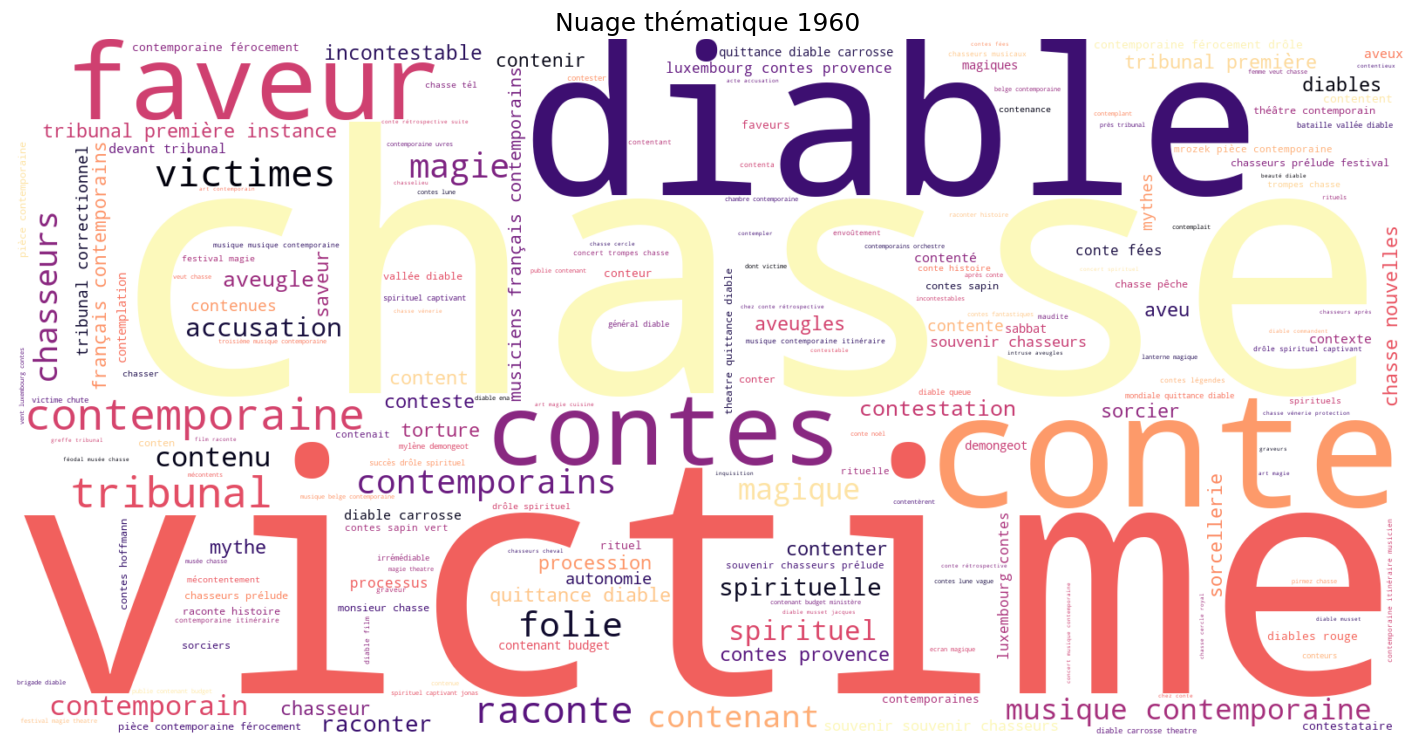


Analyse n-grammes — 1970
Top 20 : [('victimes', 20), ('chasse', 16), ('contemporaine', 13), ('raconte', 11), ('victime', 11), ('conte', 10), ('diable', 10), ('tribunal', 9), ('faveur', 8), ('magique', 8), ('musique contemporaine', 8), ('spirituel', 7), ('aveu', 5), ('aveugle', 5), ('contenant', 5), ('contenu', 5), ('tribunal correctionnel', 5), ('chasseurs', 4), ('contemporain', 4), ('contes', 4)]


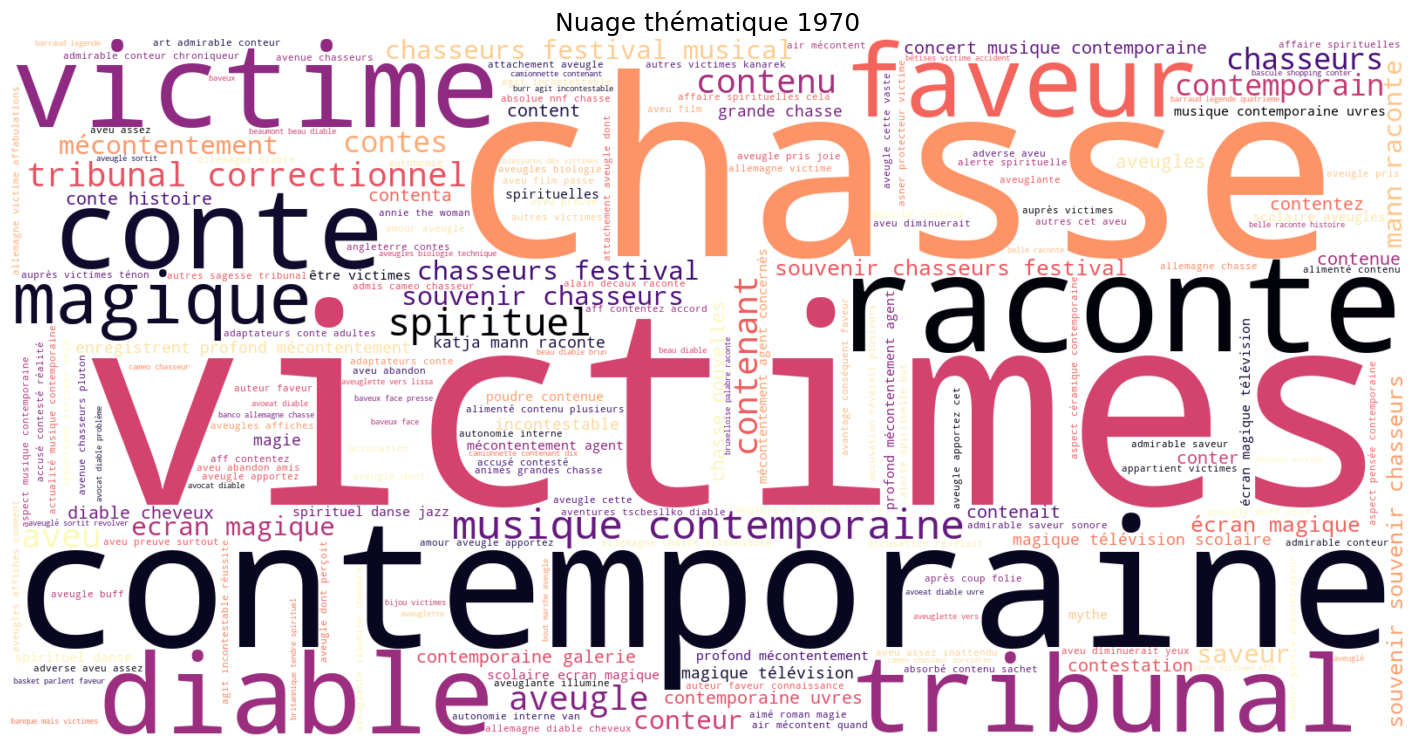


Analyse n-grammes — 1950
Top 20 : [('chasse', 254), ('diable', 191), ('tribunal', 153), ('faveur', 145), ('victime', 144), ('folie', 123), ('contenant', 117), ('victimes', 107), ('magie', 102), ('conte', 79), ('magique', 78), ('chasseur', 65), ('diables', 64), ('contenance', 62), ('spirituel', 58), ('raconte', 50), ('spirituelle', 49), ('contes', 44), ('aveu', 43), ('contemporaine', 41)]


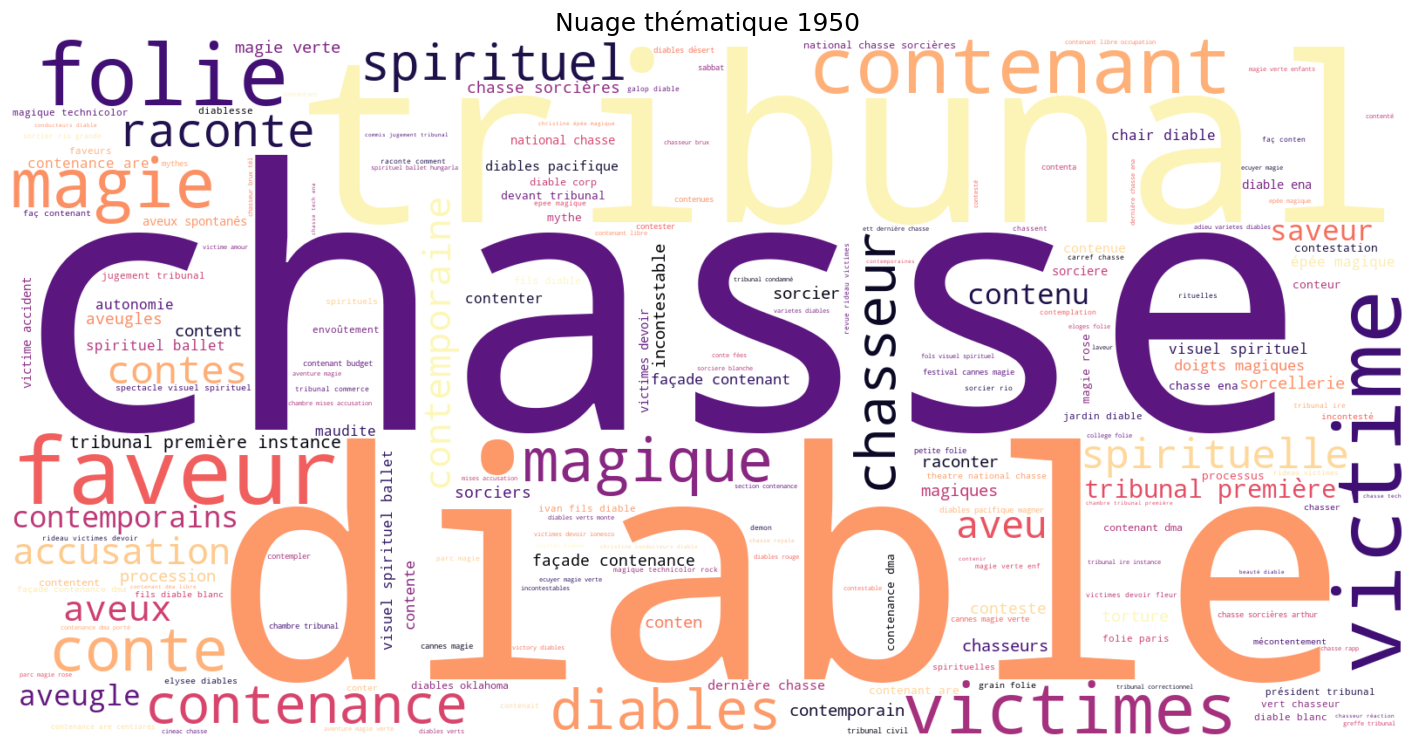

In [20]:
# ------------------------------------------------------------
# ANALYSE N-GRAMMES PAR DÉCENNIE —
# ------------------------------------------------------------
for dec, texts in corpus_decennies.items():
    print(f"\nAnalyse n-grammes — {dec}")
    comb = " ".join(texts)

    vect = CountVectorizer(ngram_range=(1,3), stop_words=list(stopwords_custom))
    X = vect.fit_transform([comb])

    feats = vect.get_feature_names_out()
    counts = X.toarray()[0]

    ngram_counts = {
        feats[i]: counts[i]
        for i in range(len(feats))
        if any(cible in feats[i] for cible in mots_cibles)
    }

    top_items = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:70]
    print("Top 20 :", top_items[:20])

    if ngram_counts:
        cloud = WordCloud(width=1600, height=800, background_color="white",
                          colormap="magma").generate_from_frequencies(ngram_counts)
        plt.figure(figsize=(18,10))
        plt.imshow(cloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Nuage thématique {dec}", fontsize=18)
        plt.savefig(f"{output_dir}/nuage_{dec}.png", dpi=300, bbox_inches="tight")
        plt.show()


In [22]:
# ------------------------------------------------------------
# TF-IDF GLOBAL
# ------------------------------------------------------------

print("\nCalcul TF-IDF global…")

documents = [" ".join(filtrer_mots(nettoyer_texte(open(os.path.join(data_path,f),'r',encoding='utf-8').read()).split()))
             for f in files]

vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(documents)
scores = dict(zip(vectorizer.get_feature_names_out(), X.toarray().mean(axis=0)))
top_tfidf = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:50]
print("Top TF-IDF :", top_tfidf)


Calcul TF-IDF global…
Top TF-IDF : [('plus', 0.21710352905173047), ('musique', 0.15786622539987796), ('ena', 0.15091570074540472), ('tél', 0.14427597374458248), ('cette', 0.13197036724171443), ('film', 0.1125670487391452), ('deux', 0.097563805468694), ('concert', 0.08238857503884349), ('être', 0.08066742216890335), ('dont', 0.07796933017326245), ('prix', 0.07562792430815), ('enf', 0.07499138099967059), ('van', 0.0704131543734511), ('très', 0.06999024028871058), ('après', 0.06988102332229572), ('sou', 0.0653776279502547), ('theatre', 0.06516569617563187), ('théâtre', 0.06344919449012351), ('france', 0.06275341709727686), ('orchestre', 0.06268185190519365), ('maison', 0.06027948706503635), ('premier', 0.058432631958815595), ('leurs', 0.0574526378231444), ('temp', 0.05595483855183176), ('admis', 0.053481813953147765), ('serum', 0.0528485242083008), ('contre', 0.05280582878370247), ('journal', 0.0521110439071893), ('belgique', 0.0519545237141231), ('jean', 0.05065270487793561), ('service'

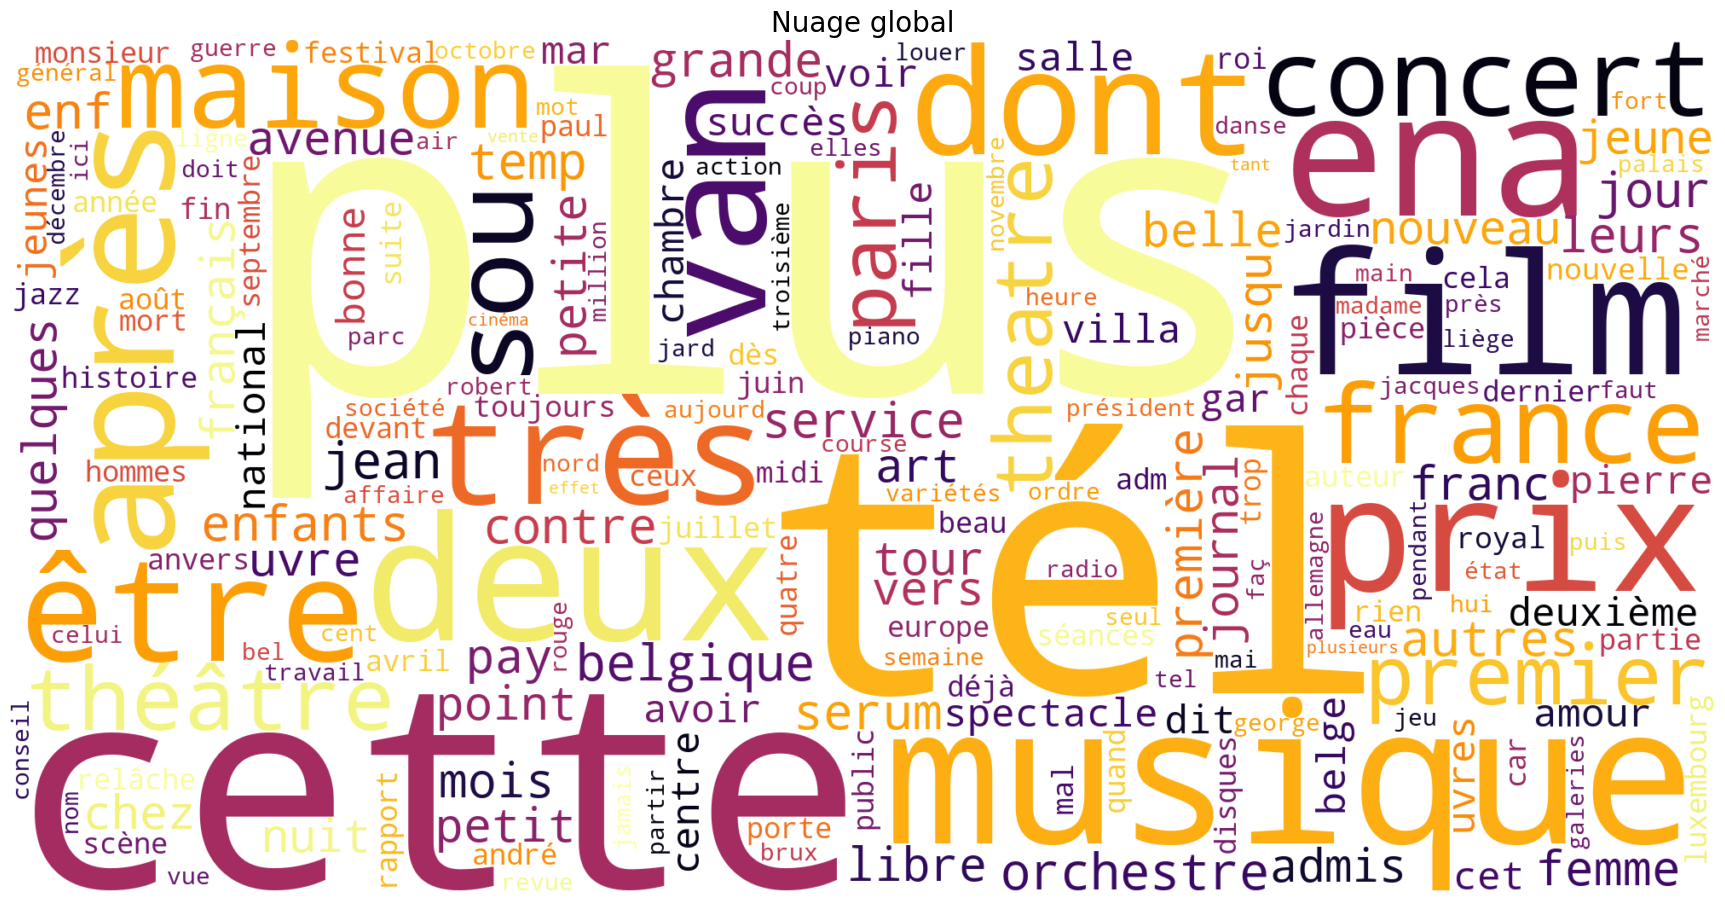


Analyse terminée.


In [23]:
# ------------------------------------------------------------
# CLOUD GLOBAL
# ------------------------------------------------------------

freq = Counter(corpus)

cloud = WordCloud(width=2000, height=1000, background_color="white",
                  colormap="inferno").generate_from_frequencies(freq)

plt.figure(figsize=(22,12))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage global", fontsize=20)
plt.show()

print("\nAnalyse terminée.")



### Si on se base que sur les mots-cibles pour le calcule des n-grammes


Analyse n-grammes (mots-cibles déterminants) — 1960
Top 20 (mots-cibles) : [('chasse', 225), ('victime', 201), ('diable', 198), ('conte', 179), ('faveur', 150), ('contes', 132), ('contemporaine', 125), ('tribunal', 119), ('raconte', 90), ('victimes', 90), ('magie', 76), ('contemporains', 71), ('chasseurs', 69), ('contenant', 67), ('magique', 61), ('musique contemporaine', 59), ('contenu', 56), ('contemporain', 55), ('folie', 53), ('spirituel', 52)]


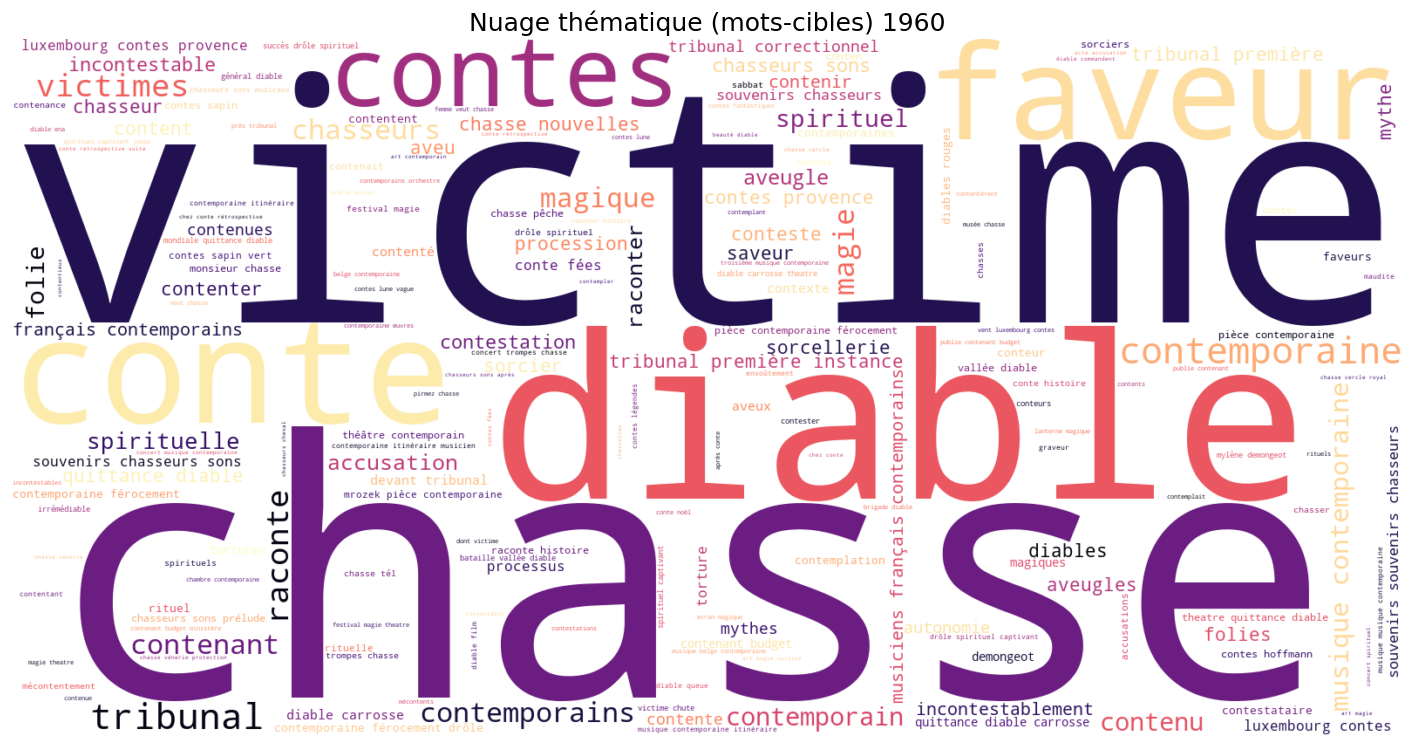


Analyse n-grammes (mots-cibles déterminants) — 1970
Top 20 (mots-cibles) : [('victimes', 20), ('chasse', 15), ('contemporaine', 13), ('raconte', 11), ('victime', 11), ('conte', 10), ('diable', 10), ('tribunal', 9), ('faveur', 8), ('magique', 8), ('musique contemporaine', 8), ('spirituel', 7), ('aveu', 5), ('aveugle', 5), ('contenant', 5), ('contenu', 5), ('tribunal correctionnel', 5), ('chasseurs', 4), ('contemporain', 4), ('contes', 4)]


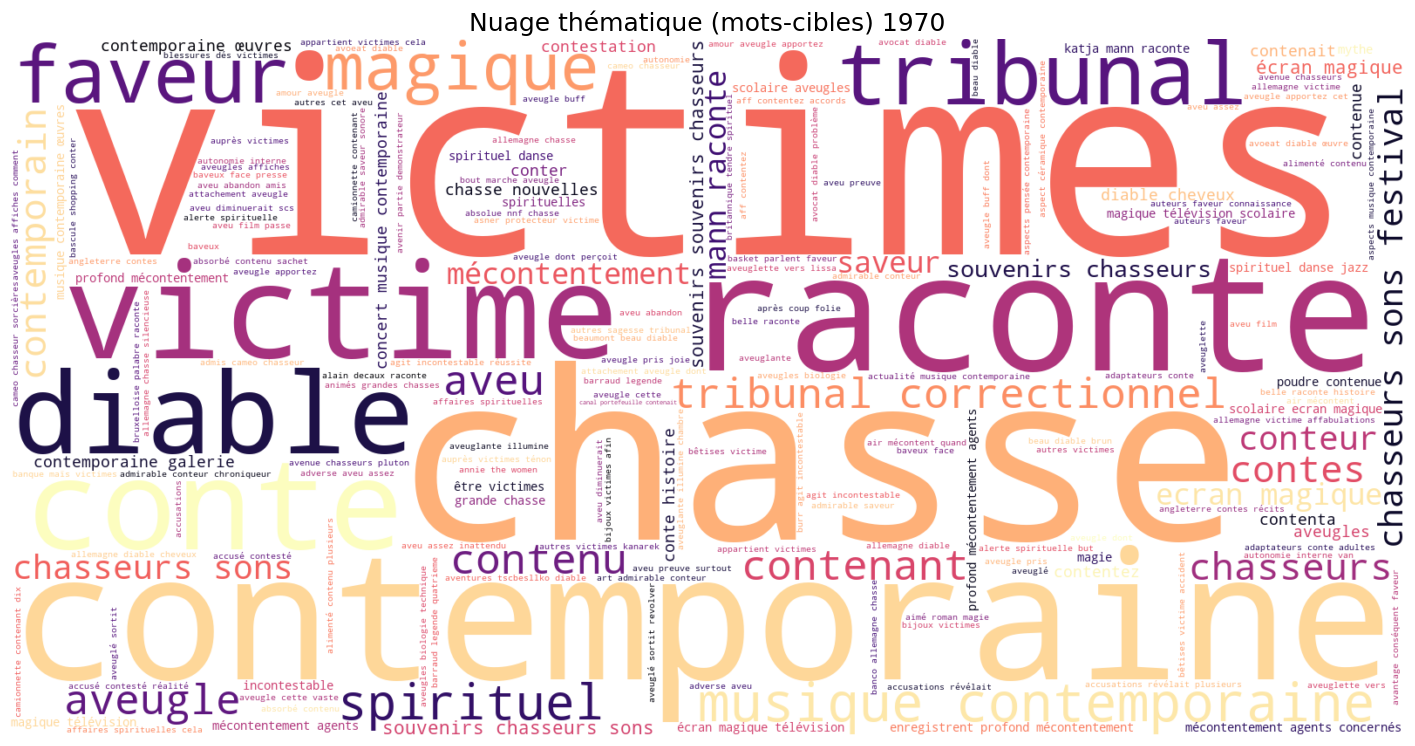


Analyse n-grammes (mots-cibles déterminants) — 1950
Top 20 (mots-cibles) : [('chasse', 243), ('diable', 191), ('tribunal', 153), ('faveur', 145), ('victime', 144), ('contenant', 117), ('victimes', 107), ('magie', 102), ('folie', 86), ('conte', 79), ('magique', 78), ('chasseur', 65), ('diables', 64), ('contenance', 62), ('spirituel', 58), ('raconte', 50), ('spirituelle', 49), ('contes', 44), ('aveu', 43), ('contemporaine', 41)]


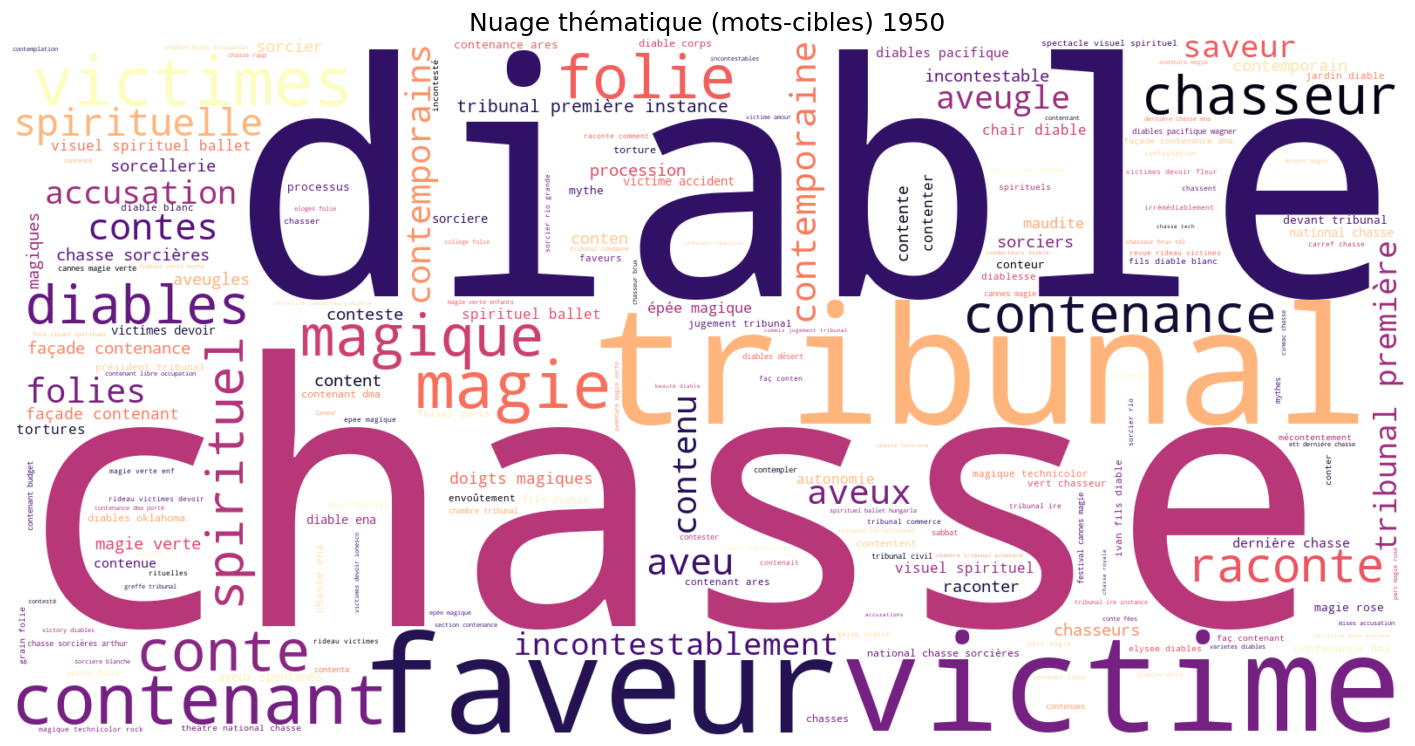

In [11]:
# ------------------------------------------------------------
# ANALYSE N-GRAMMES PAR DÉCENNIE — AVEC MOTS-CIBLES DÉTERMINANTS
# ------------------------------------------------------------

for dec, texts in corpus_decennies.items():
    print(f"\nAnalyse n-grammes (mots-cibles déterminants) — {dec}")

    comb = " ".join(texts)

    vect = CountVectorizer(ngram_range=(1,3), stop_words=list(stopwords_custom))
    X = vect.fit_transform([comb])

    feats = vect.get_feature_names_out()
    counts = X.toarray()[0]

    # Ici on ne garde que les n-grammes contenant au moins un mot-cible
    ngram_counts_cibles = {
        feats[i]: counts[i]
        for i in range(len(feats))
        if any(cible in feats[i] for cible in mots_cibles)
    }

    top_items_cibles = sorted(ngram_counts_cibles.items(), key=lambda x: x[1], reverse=True)[:70]
    print("Top 20 (mots-cibles) :", top_items_cibles[:20])

    # Wordcloud
    if ngram_counts_cibles:
        cloud_cibles = WordCloud(
            width=1600, height=800,
            background_color="white",
            colormap="magma"
        ).generate_from_frequencies(ngram_counts_cibles)

        plt.figure(figsize=(18,10))
        plt.imshow(cloud_cibles, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Nuage thématique (mots-cibles) {dec}", fontsize=18)
        plt.savefig(f"{output_dir}/nuage_cibles_{dec}.png", dpi=300, bbox_inches="tight")
        plt.show()
